In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('microsoft_train.csv')
data.shape

(10096, 83)

In [3]:
data.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


In [4]:
data.isna().sum()

MachineIdentifier                            0
ProductName                                  0
EngineVersion                                0
AppVersion                                   0
AvSigVersion                                 0
                                          ... 
Census_IsPenCapable                          0
Census_IsAlwaysOnAlwaysConnectedCapable     78
Wdft_IsGamer                               313
Wdft_RegionIdentifier                      313
HasDetections                                0
Length: 83, dtype: int64

In [5]:
data.columns

Index(['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion',
       'AvSigVersion', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform',
       'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease',
       'OsBuildLab', 'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'PuaMode',
       'SMode', 'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
       'Census_

In [6]:
num_col=[feature for feature in data.columns if data[feature].dtypes!='O']
print(f'num_col={num_col}')
cat_col=[feature for feature in data.columns if data[feature].dtypes=='O'] 
print(f'cat_col={cat_col}')

num_col=['IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode', 'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm', 'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier', 'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'OsBuild', 'OsSuite', 'IsProtected', 'AutoSampleOptIn', 'SMode', 'IeVerIdentifier', 'Firewall', 'UacLuaenable', 'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier', 'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity', 'Census_SystemVolumeTotalCapacity', 'Census_HasOpticalDiskDrive', 'Census_TotalPhysicalRAM', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_InternalPrimaryDisplayResolutionHorizontal', 'Census_InternalPrimaryDisplayResolutionVertical', 'Census_InternalBatteryNumberOfCharges', 'Census_OSBuildNumber', 'Census_OSBuildRevision', 'Census_OSInstallLanguageIdentifier', 'Census_OSUILocaleIdent

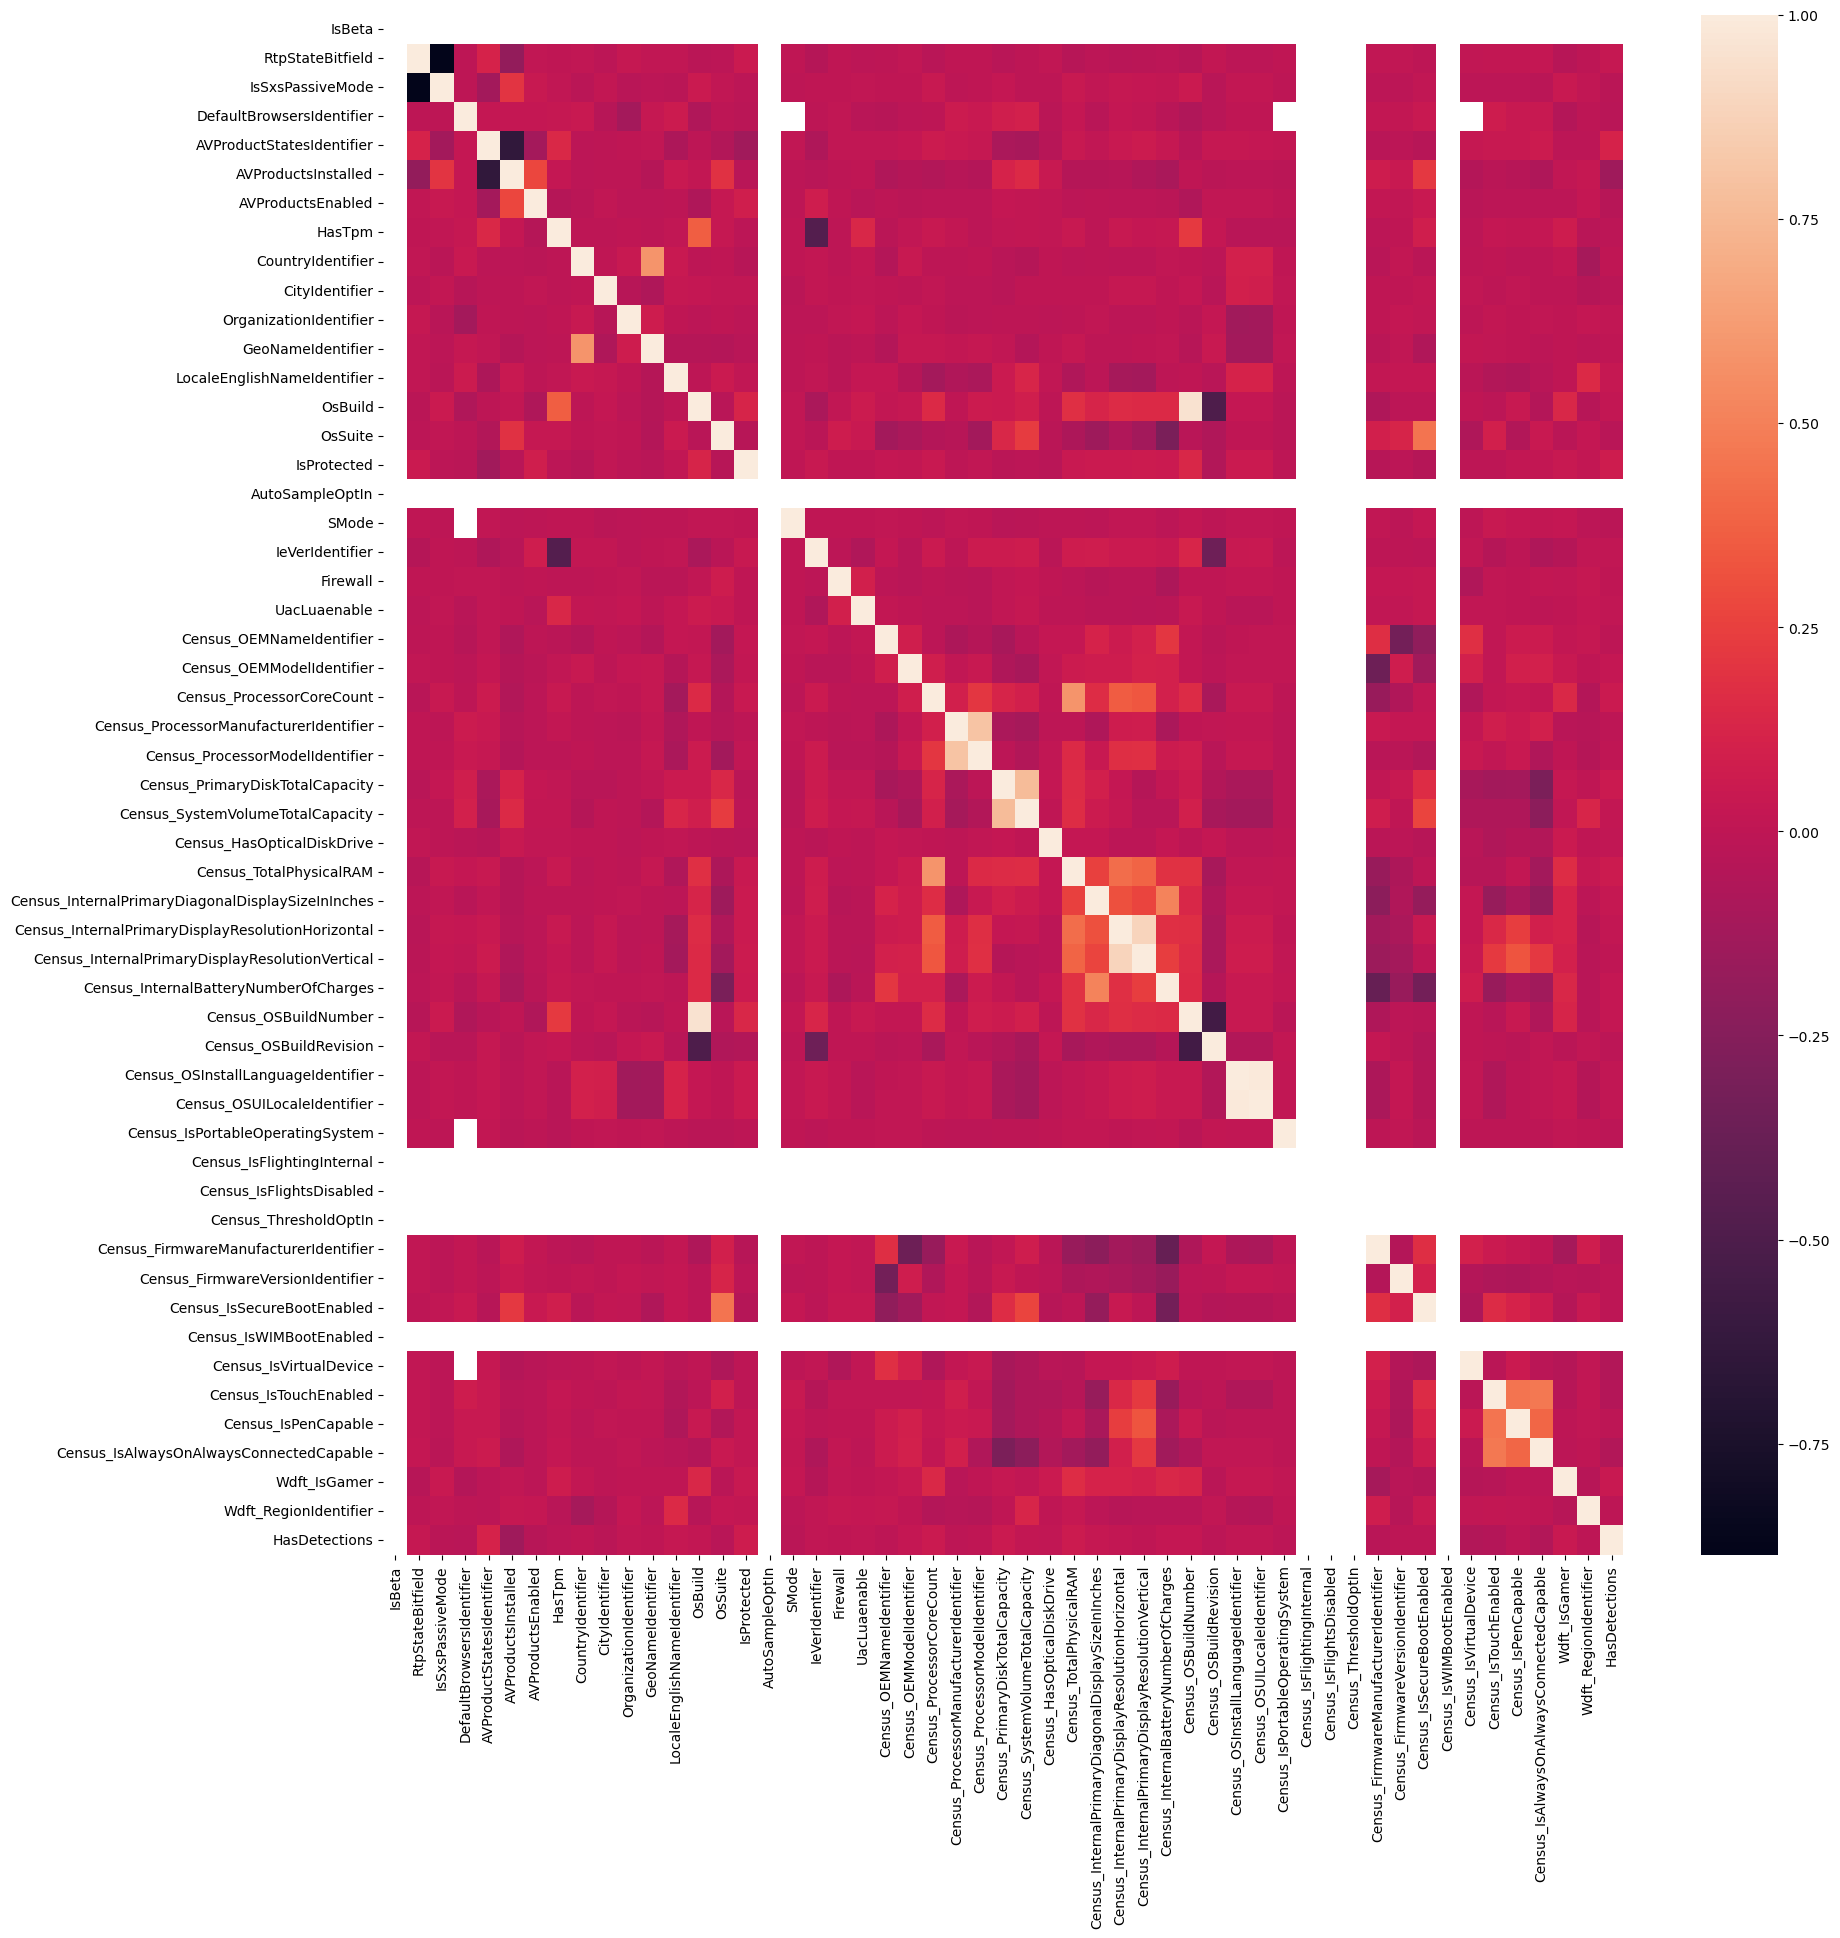

In [7]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data[num_col].corr())
plt.show()

In [24]:
data[num_col].shape

(10096, 53)

In [98]:
c=data[num_col].corr().abs()
s = c.unstack()
so = s.sort_values(ascending = False)
pp=so[so.values>0.70]
ss=pp[pp.values<1.0]
print(ss)

Census_OSUILocaleIdentifier                        Census_OSInstallLanguageIdentifier                   0.988862
Census_OSInstallLanguageIdentifier                 Census_OSUILocaleIdentifier                          0.988862
Census_OSBuildNumber                               OsBuild                                              0.950344
OsBuild                                            Census_OSBuildNumber                                 0.950344
IsSxsPassiveMode                                   RtpStateBitfield                                     0.885632
RtpStateBitfield                                   IsSxsPassiveMode                                     0.885632
Census_InternalPrimaryDisplayResolutionHorizontal  Census_InternalPrimaryDisplayResolutionVertical      0.884996
Census_InternalPrimaryDisplayResolutionVertical    Census_InternalPrimaryDisplayResolutionHorizontal    0.884996
Census_ProcessorModelIdentifier                    Census_ProcessorManufacturerIdentifier       

In [97]:
df1=data.drop(columns=['Census_OSUILocaleIdentifier','Census_OSInstallLanguageIdentifier','Census_OSBuildNumber','OsBuild', 'IsSxsPassiveMode',
'RtpStateBitfield','Census_InternalPrimaryDisplayResolutionHorizontal','Census_InternalPrimaryDisplayResolutionVertical',
'Census_ProcessorModelIdentifier','Census_ProcessorManufacturerIdentifier','Census_PrimaryDiskTotalCapacity','Census_SystemVolumeTotalCapacity'])

In [126]:
a=[]
report={}
for i in df1[cat_col]:
    l=len(df1[i].unique())
    a.append(l)
print(a)

[10096, 2, 36, 59, 1666, 4, 3, 3, 9, 206, 8, 2, 9, 11, 2, 4, 5, 23, 8, 14, 185, 3, 13, 15, 14, 9, 6, 4, 6, 7]


In [156]:
#we will consider categorical unique column upto 206, rest we will drop
df2=df1.drop(columns=['MachineIdentifier','AvSigVersion','OsBuildLab','Census_OSVersion' ])

cat_col=['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion', 'AvSigVersion', 'Platform', 'Processor', 'OsVer', 'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition', 'PuaMode', 'SmartScreen', 'Census_MDC2FormFactor', 'Census_DeviceFamily', 'Census_ProcessorClass', 'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName', 'Census_PowerPlatformRoleName', 'Census_InternalBatteryType', 'Census_OSVersion', 'Census_OSArchitecture', 'Census_OSBranch', 'Census_OSEdition', 'Census_OSSkuName', 'Census_OSInstallTypeName', 'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName', 'Census_ActivationChannel', 'Census_FlightRing']

In [143]:
cat_col1=[feature for feature in df2.columns if df2[feature].dtypes=='O'] 
print(f'cat_col={cat_col1}')

cat_col=['ProductName', 'EngineVersion', 'AppVersion', 'Platform', 'Processor', 'OsVer', 'OsPlatformSubRelease', 'SkuEdition', 'PuaMode', 'SmartScreen', 'Census_MDC2FormFactor', 'Census_DeviceFamily', 'Census_ProcessorClass', 'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName', 'Census_PowerPlatformRoleName', 'Census_InternalBatteryType', 'Census_OSArchitecture', 'Census_OSBranch', 'Census_OSEdition', 'Census_OSSkuName', 'Census_OSInstallTypeName', 'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName', 'Census_ActivationChannel', 'Census_FlightRing']


In [144]:
for i  in cat_col1:
    p=df2[i].value_counts()
    print(p)
    print('='*12)

win8defender    9995
mse              101
Name: ProductName, dtype: int64
1.1.15200.1    4398
1.1.15100.1    4184
1.1.15000.2     278
1.1.14901.4     206
1.1.14600.4     172
1.1.15300.6     155
1.1.14800.3     143
1.1.14104.0      88
1.1.13504.0      81
1.1.15300.5      74
1.1.14500.5      55
1.1.14700.5      50
1.1.14405.2      50
1.1.14306.0      36
1.1.13303.0      22
1.1.14202.0      15
1.1.13804.0      13
1.1.13601.0      12
1.1.13407.0      10
1.1.14003.0       9
1.1.13903.0       8
1.1.15000.1       5
1.1.13704.0       4
1.1.14305.0       4
1.1.13202.0       4
1.1.12902.0       4
1.1.13103.0       3
1.1.13701.0       3
1.1.14700.3       2
1.1.13000.0       2
1.1.12805.0       1
1.1.14901.3       1
1.1.14002.0       1
1.1.14103.0       1
1.1.14700.4       1
1.1.14800.1       1
Name: EngineVersion, dtype: int64
4.18.1807.18075     5932
4.18.1806.18062      942
4.12.16299.15        373
4.13.17134.1         301
4.10.209.0           290
4.13.17134.228       248
4.16.17656.18052     2

In [213]:
df2['EngineVersion'].unique()

array(['1.1.15100.1', '1.1.14600.4', '1.1.15200.1', '1.1.15300.6',
       '1.1.13504.0', '1.1.14800.3', '1.1.15000.2', '1.1.14104.0',
       '1.1.13804.0', '1.1.14306.0', '1.1.15000.1', '1.1.13407.0',
       '1.1.14405.2', '1.1.14901.4', '1.1.14700.3', '1.1.14202.0',
       '1.1.13303.0', '1.1.13701.0', '1.1.13000.0', '1.1.15300.5',
       '1.1.14500.5', '1.1.14700.5', '1.1.14003.0', '1.1.13601.0',
       '1.1.13903.0', '1.1.12805.0', '1.1.13202.0', '1.1.12902.0',
       '1.1.14305.0', '1.1.13704.0', '1.1.14901.3', '1.1.14002.0',
       '1.1.14103.0', '1.1.14700.4', '1.1.14800.1', '1.1.13103.0'],
      dtype=object)

In [214]:
other_version=['1.1.14600.4', '1.1.15300.6','1.1.13504.0', '1.1.14800.3',
               '1.1.15000.2', '1.1.14104.0','1.1.13804.0', '1.1.14306.0',
               '1.1.15000.1', '1.1.13407.0','1.1.14405.2', '1.1.14901.4',
               '1.1.14700.3', '1.1.14202.0','1.1.13303.0', '1.1.13701.0', 
               '1.1.13000.0', '1.1.15300.5','1.1.14500.5', '1.1.14700.5',
               '1.1.14003.0', '1.1.13601.0','1.1.13903.0', '1.1.12805.0',
               '1.1.13202.0', '1.1.12902.0','1.1.14305.0', '1.1.13704.0',
               '1.1.14901.3', '1.1.14002.0','1.1.14103.0', '1.1.14700.4',
               '1.1.14800.1', '1.1.13103.0']
df2['EngineVersion']=df2['EngineVersion'].replace(to_replace=other_version,value='other_engine_version')

In [157]:
a=[]
for i in df2['AppVersion']:
    sp=i.split('.')
    new_val=sp[0]+'.'+sp[1]
    a.append(new_val)
df2['AppVersion']=a

In [163]:
df2['AppVersion'].unique()

array(['4.18', '4.13', '4.9', '4.10', '4.8', '4.12', '4.14', '4.11',
       '4.16', '4.6', '4.4'], dtype=object)

In [164]:
df2['AppVersion'].value_counts()

4.18    6895
4.13     586
4.12     580
4.10     499
4.9      475
4.8      307
4.14     271
4.16     247
4.11     233
4.6        2
4.4        1
Name: AppVersion, dtype: int64

In [165]:
app_ver1=['4.10','4.12','4.13']
app_ver2=['4.9','4.8','4.14','4.11','4.6','4.4']
df2['AppVersion']=df2['AppVersion'].replace(to_replace=app_ver1,value='app_vers1')
df2['AppVersion']=df2['AppVersion'].replace(to_replace=app_ver2,value='app_vers2')

In [166]:
df2['OsPlatformSubRelease'].unique()

array(['rs4', 'rs1', 'rs3', 'windows7', 'windows8.1', 'th1', 'rs2', 'th2',
       'prers5'], dtype=object)

In [169]:
sub_release=['rs1', 'windows7', 'windows8.1', 'th1', 'rs2', 'th2', 'prers5']
df2['OsPlatformSubRelease']=df2['OsPlatformSubRelease'].replace(to_replace=sub_release,value='rs_oth')

In [170]:
df2['SkuEdition'].unique()

array(['Pro', 'Home', 'Invalid', 'Enterprise LTSB', 'Enterprise',
       'Education', 'Cloud', 'Server'], dtype=object)

In [171]:
sku_edition=['Invalid', 'Enterprise LTSB', 'Enterprise','Education', 'Cloud', 'Server']
df2['SkuEdition']=df2['SkuEdition'].replace(to_replace=sku_edition,value='other_edition')

In [172]:
df2=df2.drop(columns=['PuaMode'],axis=1)

In [173]:
df2['SmartScreen'].unique()

array([nan, 'RequireAdmin', 'ExistsNotSet', 'Off', 'Warn', 'Prompt',
       'Block', 'off', 'On'], dtype=object)

In [174]:
other_issue=['Off', 'Warn', 'Prompt','Block', 'off', 'On']
df2['SmartScreen']=df2['SmartScreen'].replace(to_replace=other_issue,value='other_issues')

In [175]:
df2['Census_MDC2FormFactor'].unique()

array(['Desktop', 'Notebook', 'Detachable', 'PCOther', 'AllInOne',
       'Convertible', 'SmallTablet', 'LargeTablet', 'SmallServer',
       'LargeServer', 'MediumServer'], dtype=object)

In [176]:
server=['SmallServer','LargeServer', 'MediumServer']
tablet=['Detachable', 'PCOther', 'AllInOne','Convertible', 'SmallTablet','LargeTablet']

df2['Census_MDC2FormFactor']=df2['Census_MDC2FormFactor'].replace(to_replace=server, value='server')
df2['Census_MDC2FormFactor']=df2['Census_MDC2FormFactor'].replace(to_replace=tablet, value='tab_other')

In [177]:
df2['Census_PrimaryDiskTypeName'].unique()

array(['HDD', 'SSD', 'UNKNOWN', 'Unspecified', nan], dtype=object)

In [178]:
unknown=['UNKNOWN', 'Unspecified']
df2['Census_PrimaryDiskTypeName']=df2['Census_PrimaryDiskTypeName'].replace(to_replace=unknown, value='unknown')

In [179]:
df2['Census_ChassisTypeName'].unique()

array(['Desktop', 'Notebook', 'MiniTower', 'Portable', 'Detachable',
       'Laptop', 'AllinOne', 'LowProfileDesktop', 'SpaceSaving', 'Other',
       'Unknown', 'HandHeld', 'UNKNOWN', 'Convertible', 'Tower',
       'MainServerChassis', 'LunchBox', 'SubNotebook', 'MiniPC',
       'RackMountChassis', 'Tablet', '30', 'StickPC'], dtype=object)

In [180]:
laptop_other=['MiniTower', 'Portable', 'Detachable','Laptop', 'AllinOne',
              'LowProfileDesktop', 'SpaceSaving', 'Other','Unknown',
              'HandHeld', 'UNKNOWN', 'Convertible', 'Tower',
              'MainServerChassis', 'LunchBox', 'SubNotebook', 'MiniPC','RackMountChassis', 'Tablet', '30', 'StickPC']
df2['Census_ChassisTypeName']=df2['Census_ChassisTypeName'].replace(to_replace=laptop_other,value='laptop_others')

In [182]:
df2['Census_PowerPlatformRoleName'].unique()

array(['Desktop', 'Mobile', 'Slate', 'Workstation', 'SOHOServer',
       'UNKNOWN', 'AppliancePC', 'EnterpriseServer'], dtype=object)

In [183]:
power_plat=['Slate','Workstation','SOHOServer','UNKNOWN', 'AppliancePC', 'EnterpriseServer']
df2['Census_PowerPlatformRoleName']=df2['Census_PowerPlatformRoleName'].replace(to_replace=power_plat,value='othPowerplatForm')

In [186]:
#considering all the categories as lithion in battery type
df2=df2.drop(columns=['Census_InternalBatteryType'],axis=1)

In [187]:
df2['Census_OSBranch'].unique()

array(['rs4_release', 'rs1_release', 'rs3_release_svc_escrow',
       'th2_release', 'rs3_release', 'th1_st1', 'rs2_release', 'th1',
       'rs3_release_svc_escrow_im', 'th2_release_sec', 'rs5_release',
       'rs_prerelease_flt', 'rs_prerelease'], dtype=object)

In [188]:
rsth_other=['th1','rs5_release','rs_prerelease_flt', 'rs_prerelease']
df2['Census_OSBranch']=df2['Census_OSBranch'].replace(to_replace=rsth_other,value='rsth_other')

In [189]:
df2['Census_OSEdition'].unique()

array(['Professional', 'Core', 'CoreSingleLanguage', 'EnterpriseS',
       'CoreCountrySpecific', 'EnterpriseSN', 'ProfessionalEducation',
       'Enterprise', 'Education', 'Cloud', 'ProfessionalN',
       'ServerStandard', 'CoreN', 'ServerStandardEval', 'EducationN'],
      dtype=object)

In [190]:
othProfessional=['EnterpriseS', 'EnterpriseSN', 'ProfessionalEducation',
                 'Enterprise', 'Education', 'Cloud', 'ProfessionalN',
                 'ServerStandard', 'CoreN', 'ServerStandardEval', 'EducationN']
df2['Census_OSEdition']=df2['Census_OSEdition'].replace(to_replace=othProfessional,value='othProfessional')

In [191]:
#since Census_OSSkuName and Census_OSEdition are of same data type and value we will consider one:
df2=df2.drop(columns='Census_OSSkuName',axis=1)

In [192]:
df2['Census_OSInstallTypeName'].unique()

array(['UUPUpgrade', 'IBSClean', 'Update', 'Upgrade', 'Other', 'Clean',
       'Reset', 'Refresh', 'CleanPCRefresh'], dtype=object)

In [193]:
clean=['Clean','CleanPCRefresh']
df2['Census_OSInstallTypeName']=df2['Census_OSInstallTypeName'].replace(to_replace=clean,value='clean')

In [194]:
df2['Census_ActivationChannel'].unique()

array(['Retail', 'OEM:NONSLP', 'OEM:DM', 'Volume:GVLK', 'Volume:MAK',
       'Retail:TB:Eval'], dtype=object)

In [195]:
retail=['Retail', 'Retail:TB:Eval']
OEM=['OEM:NONSLP', 'OEM:DM']
Vol=['Volume:GVLK', 'Volume:MAK']
df2['Census_ActivationChannel']=df2['Census_ActivationChannel'].replace(to_replace=retail,value='Retail')
df2['Census_ActivationChannel']=df2['Census_ActivationChannel'].replace(to_replace=OEM,value='OEM')
df2['Census_ActivationChannel']=df2['Census_ActivationChannel'].replace(to_replace=Vol,value='Volume')

In [196]:
df2['Census_FlightRing'].unique()

array(['Retail', 'NOT_SET', 'Unknown', 'Disabled', 'RP', 'WIS', 'WIF'],
      dtype=object)

In [197]:
others=['NOT_SET', 'Unknown', 'Disabled', 'RP', 'WIS', 'WIF']
df2['Census_FlightRing']=df2['Census_FlightRing'].replace(to_replace=others,value='not_set')

In [216]:
df2.shape

(10096, 64)

In [217]:
X=df2.drop(columns=['HasDetections'],axis=1)
y=df2['HasDetections']

In [218]:
print(X.shape)
print(y.shape)

(10096, 63)
(10096,)


In [219]:
y.value_counts()

1    5100
0    4996
Name: HasDetections, dtype: int64

In [220]:
cat_col2=[feature for feature in X.columns if X[feature].dtypes=='O']
num_col2=[feature for feature in X.columns if X[feature].dtypes!='O']

In [221]:
print(f'Categorical column: {cat_col2}')
print(f'Numerical column: {num_col2}')

Categorical column: ['ProductName', 'EngineVersion', 'AppVersion', 'Platform', 'Processor', 'OsVer', 'OsPlatformSubRelease', 'SkuEdition', 'SmartScreen', 'Census_MDC2FormFactor', 'Census_DeviceFamily', 'Census_ProcessorClass', 'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName', 'Census_PowerPlatformRoleName', 'Census_OSArchitecture', 'Census_OSBranch', 'Census_OSEdition', 'Census_OSInstallTypeName', 'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName', 'Census_ActivationChannel', 'Census_FlightRing']
Numerical column: ['IsBeta', 'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm', 'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier', 'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'OsSuite', 'IsProtected', 'AutoSampleOptIn', 'SMode', 'IeVerIdentifier', 'Firewall', 'UacLuaenable', 'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount', 'Census_HasOpticalDiskDrive', 'Censu

In [222]:
for i  in cat_col2:
    p=X[i].value_counts()
    print(p)
    print('='*12)

win8defender    9995
mse              101
Name: ProductName, dtype: int64
1.1.15200.1             4398
1.1.15100.1             4184
other_engine_version    1514
Name: EngineVersion, dtype: int64
4.18         6895
app_vers1    1665
app_vers2    1289
4.16          247
Name: AppVersion, dtype: int64
windows10      9776
windows8        205
windows7        101
windows2016      14
Name: Platform, dtype: int64
x64      9182
x86       912
arm64       2
Name: Processor, dtype: int64
10.0.0.0    9790
6.3.0.0      205
6.1.1.0      101
Name: OsVer, dtype: int64
rs4       4517
rs_oth    2793
rs3       2786
Name: OsPlatformSubRelease, dtype: int64
Home             6134
Pro              3766
other_edition     196
Name: SkuEdition, dtype: int64
RequireAdmin    4880
ExistsNotSet    1165
other_issues     416
Name: SmartScreen, dtype: int64
Notebook     6450
Desktop      2267
tab_other    1364
server         15
Name: Census_MDC2FormFactor, dtype: int64
Windows.Desktop    10082
Windows.Server        14
Na

In [223]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import f1_score,classification_report,accuracy_score

In [224]:
num_pipeline=Pipeline(steps=(['imputer',SimpleImputer(strategy='median')],
                            ['scaler',StandardScaler()]))
cat_pipeline=Pipeline(steps=(['imputer',SimpleImputer(strategy='most_frequent')],
                            ['encoder',OneHotEncoder()]))
preprocessor=ColumnTransformer([('numerical_pipeline',num_pipeline,num_col1),
                              ('categorical_pipeline',cat_pipeline,cat_col1)])

In [225]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.38,random_state=30)

In [226]:
print(X_train.shape)
print(X_test.shape)

(6259, 63)
(3837, 63)


In [227]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [231]:
models={'LogisticRegression': LogisticRegression(),
       'RandomForest':RandomForestClassifier(),
       'GradientBoosting':GradientBoostingClassifier()}
#params={'LogisticRegression':{'max_iter':[100],'penalty':['l2']},
#       'RandomForest':{'n_estimators': [100,300,500],'max_depth':[15],'min_samples_split':[5],'random_state':[1]},
#       'GradientBoosting':{'n_estimators': [100,300,500],'max_depth':[15],'min_samples_split' :[5],'random_state':[1]}}

In [232]:
def evaluate_models(X_train,X_test,y_train,y_test,models):
    report={}
    for i in range(len(list(models))):
        model=list(models.values())[i]
        #param=params[list(models.keys())[i]]
        
        #gs=GridSearchCV(model,param,cv=3)
        #gs.fit(X_train,y_train)
        
        #model.set_params(**gs.best_params_)
        model.fit(X_train,y_train)
        
        y_test_pred=model.predict(X_test)
        f1score=(f1_score(y_test,y_test_pred))*100
        
        print(f'{list(models.keys())[i]} :')
        print(classification_report(y_test,y_test_pred))
        
        report[list(models.keys())[i]]=f1score
        
        best_score=max(list(report.values()))
        best_model=list(filter(lambda x:report[x]==best_score,report))[0]
    print(f'The Best score of models:{best_model} : {best_score}')
    return report

In [234]:
evaluate_models(X_train,X_test,y_train,y_test,models)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression :
              precision    recall  f1-score   support

           0       0.62      0.61      0.62      1931
           1       0.61      0.63      0.62      1906

    accuracy                           0.62      3837
   macro avg       0.62      0.62      0.62      3837
weighted avg       0.62      0.62      0.62      3837

RandomForest :
              precision    recall  f1-score   support

           0       0.61      0.62      0.62      1931
           1       0.61      0.60      0.61      1906

    accuracy                           0.61      3837
   macro avg       0.61      0.61      0.61      3837
weighted avg       0.61      0.61      0.61      3837

GradientBoosting :
              precision    recall  f1-score   support

           0       0.64      0.58      0.61      1931
           1       0.61      0.67      0.64      1906

    accuracy                           0.62      3837
   macro avg       0.62      0.62      0.62      3837
weighted avg       

{'LogisticRegression': 62.160062160062154,
 'RandomForest': 60.82365364308342,
 'GradientBoosting': 63.69554331497246}